In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [2]:
# 線性調整
def project(arr, low=0, high=255): # 1D正規化  將分布投影到 0~255(low~high) 原 min value 和 max value 投影至 0~255
    armin = arr.min()
    armax = arr.max()
    ar = ((high - low) * ((arr - armin)/(armax - armin))) + low
    return ar

def project2(arr, in_l=0, in_h=255, out_l=0, out_h=255): # 1D正規化 原arr 設定 min value 和 max value 投影至 0~255
    ar = ((out_h - out_l) * ((arr - in_l)/(in_h - in_l))) + out_l
    ar = overval(ar)
    return ar

# 明暗限制
def overval(arr, low=0, high=255): # 過亮 過暗  把過高過低 value 給過濾掉
    return np.minimum(np.maximum(arr, low), high)

# 顯示圖片
def show_(arr):
    return Image.fromarray(np.uint8(arr))

# RGB 長條圖
def get_info(arr):
    fn = arr.shape[-1] # channel 數
    info_RGB = {} # 空字典
    for i in range(fn): # np.histogram 輸出分布的量
        ar = np.histogram(arr[:,:,i].flatten(), bins=range(257))[0] # np.histogram(arr) 取得arr中的數值分布
        info_RGB[i] = np.cumsum(ar) # np.cumsum(arr) 取得 arr累積值
    return info_RGB

def RGB_His(arr):
    plt.figure(figsize=(15, 4))
    plt.xlim(0, 256)
    plt.title('RGB')
    fn = arr.shape[2]
    for i in range(fn-1, -1, -1): # RGB分布長條圖 i = [2, 1, 0]
        plt.hist(arr[:,:,i].flatten(), bins=range(257), alpha=0.33, edgecolor='none')

In [3]:
p = Image.open("p04.jpg").resize((480, 360))

In [4]:
arr = np.array(p) # 400*300*3
s = 1 # 減少顏色量 s = 2 (0~255 -> 0, 2, 4 .... 254)
arr = ((arr//s) * s) + (s//2)

ar = arr.flatten() # RGB 統一轉換
ar3 = arr.reshape(-1, 3) # RGB 分開轉換 120000*3

info = np.cumsum(np.histogram(ar, bins=range(257))[0]) # np.cumsum(arr) 取得 arr累積值
info_RGB = get_info(arr) # 獲得 RGB 累積資訊 

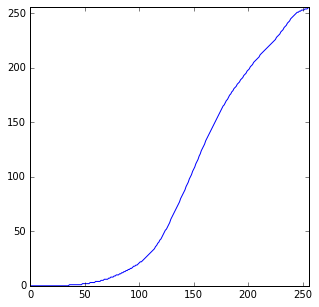

In [5]:
siz = arr.size # 轉換模式
f = (info * 255 / siz).astype(np.uint8)
plt.figure(figsize=(5, 5))
plt.xlim(0, 256)
plt.ylim(0, 256)
plt.plot(f)

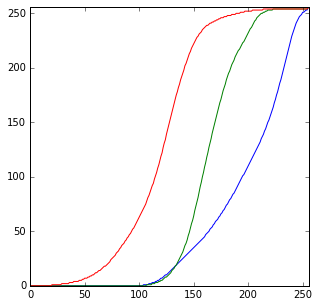

In [6]:
siz_RGB = ar3.shape[0] # 轉換模式
f_RGB = np.zeros((3, 256))
for i in range(3):
    f_RGB[i] = ((info_RGB[i] * 255 / siz_RGB).astype(np.uint8))
plt.figure(figsize=(5, 5))
plt.xlim(0, 256)
plt.ylim(0, 256)
for i in range(3):
    plt.plot(f_RGB[i])

In [7]:
art = np.zeros_like(ar) # RGB 一起轉換
for i in range(siz):
    art[i] = f[ar[i]]

art3 = np.zeros_like(ar3) # RGB 分開轉換
for n in range(3):
    for i in range(siz_RGB):
        art3[i, n] = f_RGB[n][ar3[i, n]]

### 修正展示

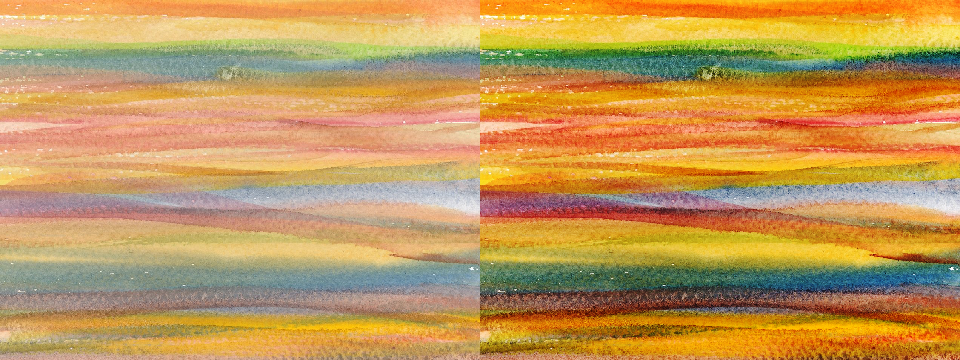

In [8]:
art = art.reshape(arr.shape)
pp = np.concatenate((arr, art), axis=1)
show_(pp)

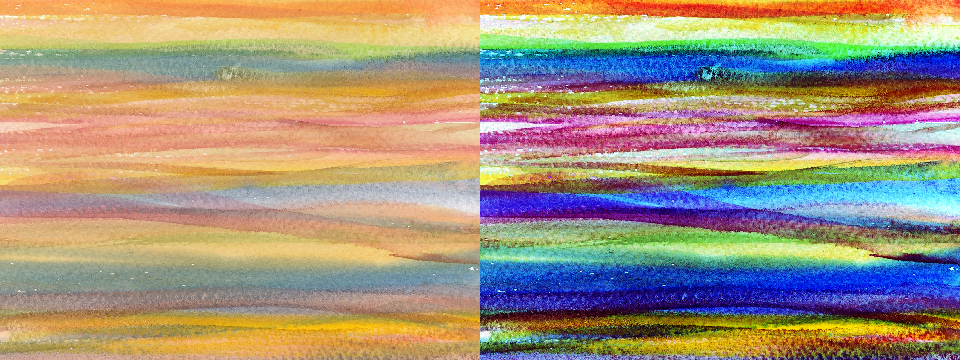

In [9]:
art3 = art3.reshape(arr.shape)
pp = np.concatenate((arr, art3), axis=1)
show_(pp)

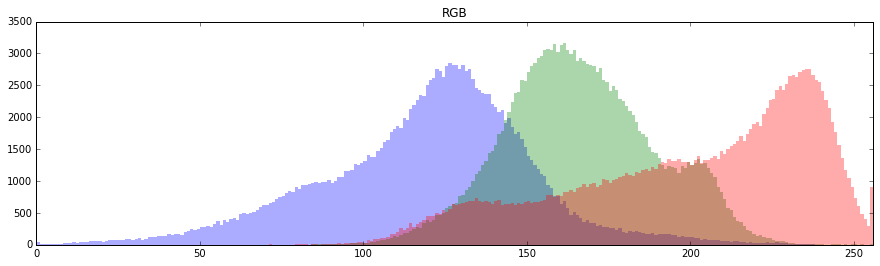

In [10]:
RGB_His(arr) # Original Image

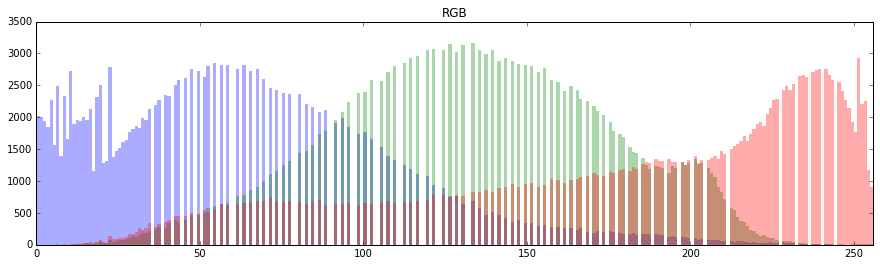

In [11]:
RGB_His(art) # RGB 整合 (顏色上 線性移動)

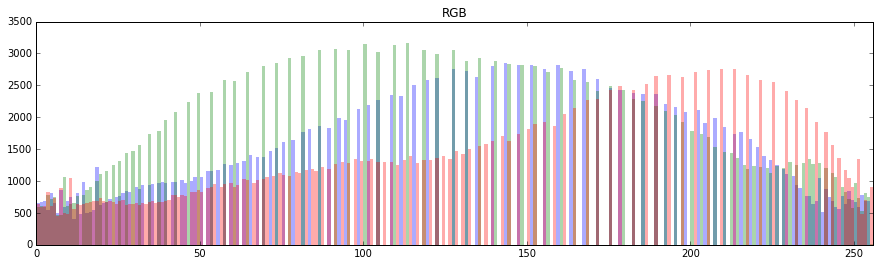

In [12]:
RGB_His(art3) # RGB 分開 (顏色上 離散移動) RGB三色移動量不同